In [2]:
#pip install mediapipe

  Using cached mediapipe-0.8.9.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (32.7 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
Note: you may need to restart the kernel to use updated packages.


In [29]:
import cv2
import mediapipe as mp
import numpy as np

In [30]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [43]:
IMAGE_FILES = ['./before/Image/3.jpg'] #우진이 자는 사진
BG_COLOR = (192, 192, 192) # gray

[[[202 208 203]
  [200 206 201]
  [198 204 199]
  ...
  [188 192 186]
  [188 192 186]
  [185 189 183]]

 [[202 208 203]
  [201 207 202]
  [199 205 200]
  ...
  [186 190 184]
  [187 191 185]
  [187 191 185]]

 [[202 208 203]
  [201 207 202]
  [201 207 202]
  ...
  [185 189 183]
  [186 190 184]
  [188 192 186]]

 ...

 [[180 154 140]
  [180 154 140]
  [179 153 139]
  ...
  [182 191 170]
  [183 192 171]
  [184 193 172]]

 [[180 154 140]
  [180 154 140]
  [179 153 139]
  ...
  [178 187 166]
  [184 193 172]
  [182 191 170]]

 [[179 153 139]
  [179 153 139]
  [178 152 138]
  ...
  [180 189 168]
  [182 191 170]
  [178 187 166]]]
Nose coordinates: (712.860294342041, 1408.3771076202393)


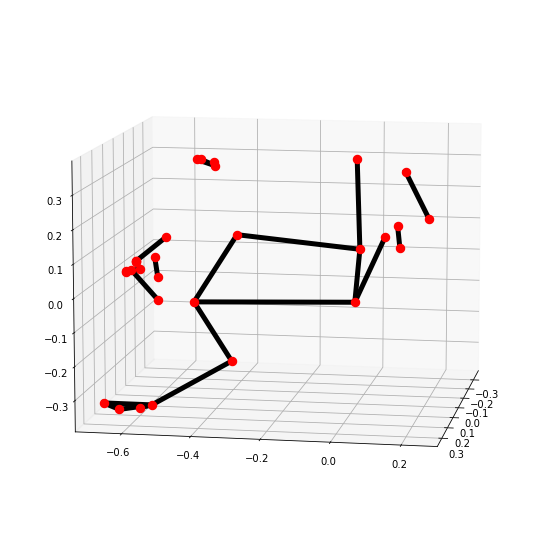

In [44]:
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    print(image)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
    )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)